In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pplt
import seaborn as sns

In [4]:
data = pd.read_csv("D:/Unified mentor/1 month/project/Drugs, Side Effects and Medical Condition/database/drugs_side_effects_drugs_com.csv")

In [5]:
data.head(10)

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html
5,Aldactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...",CaroSpir,35%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.6,8.0,https://www.drugs.com/aldactone.html,https://www.drugs.com/condition/acne.html
6,tretinoin,Acne,hives ; difficult breathing; swelling of your ...,tretinoin topical,Topical acne agents,"Altreno, Atralin, Avita, Refissa, Renova, Reti...",30%,Rx,C,N,NaN,NaN,Acne Other names: Acne Vulgaris; Blackheads; B...,7.7,439.0,https://www.drugs.com/mtm/tretinoin-topical.html,https://www.drugs.com/condition/acne.html
7,isotretinoin,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...","Absorica, Accutane, Amnesteem, Claravis, Myori...",26%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,8.0,999.0,https://www.drugs.com/mtm/isotretinoin.html,https://www.drugs.com/condition/acne.html
8,Bactrim,Acne,"skin rash, fever, swollen glands, joint pain, ...",sulfamethoxazole and trimethoprim,Sulfonamides,Bactrim DS,20%,Rx,D,N,X,NaN,Acne Other names: Acne Vulgaris; Blackheads; B...,8.5,96.0,https://www.drugs.com/bactrim.html,https://www.drugs.com/condition/acne.html
9,Retin-A,Acne,hives; difficult breathing; swelling of your f...,Retin-A,Topical acne agents,NaN,17%,Rx,C,N,NaN,NaN,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,86.0,https://www.drugs.com/retin-a.html,https://www.drugs.com/condition/acne.html


In [6]:
data.columns

Index(['drug_name', 'medical_condition', 'side_effects', 'generic_name',
       'drug_classes', 'brand_names', 'activity', 'rx_otc',
       'pregnancy_category', 'csa', 'alcohol', 'related_drugs',
       'medical_condition_description', 'rating', 'no_of_reviews', 'drug_link',
       'medical_condition_url'],
      dtype='object')

In [7]:
data.isnull().sum()

drug_name                           0
medical_condition                   0
side_effects                      124
generic_name                       43
drug_classes                       82
brand_names                      1213
activity                            0
rx_otc                              1
pregnancy_category                229
csa                                 0
alcohol                          1554
related_drugs                    1469
medical_condition_description       0
rating                           1345
no_of_reviews                    1345
drug_link                           0
medical_condition_url               0
dtype: int64

In [10]:
data = data.fillna({
   "side_effects" :"Unknown",                   
"generic_name":"Unknown",                 
"drug_classes":"Unknown",
"brand_names":"NOT GIVEN",
"rx_otc":"Unknown",                              
"pregnancy_category" :"Unknown",               
"alcohol":"No" ,                       
"related_drugs": "NOT GIVEN",
})

data[["rating","no_of_reviews"]] = data[["rating","no_of_reviews"]].fillna(0)


print("done")


done


In [11]:
data.isnull().sum()

drug_name                        0
medical_condition                0
side_effects                     0
generic_name                     0
drug_classes                     0
brand_names                      0
activity                         0
rx_otc                           0
pregnancy_category               0
csa                              0
alcohol                          0
related_drugs                    0
medical_condition_description    0
rating                           0
no_of_reviews                    0
drug_link                        0
medical_condition_url            0
dtype: int64

In [13]:
data["alcohol"] = data["alcohol"].replace("No","No Interaction")
data["alcohol"] = data["alcohol"].replace("x", "Interaction Present")


In [14]:
data.head()

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,No Interaction,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NOT GIVEN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,No Interaction,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


In [15]:
data.describe(include="all")

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
count,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931.000000,2931.000000,2931,2931
unique,2912,47,2760,1393,275,1553,93,4,7,7,2,536,47,NaN,NaN,2931,47
top,triamcinolone,Pain,Unknown,Unknown,Upper respiratory combinations,NOT GIVEN,0%,Rx,C,N,No Interaction,NOT GIVEN,Pain An unpleasant sensory and emotional exper...,NaN,NaN,https://www.drugs.com/mtm/setmelanotide.html,https://www.drugs.com/condition/pain.html
freq,3,264,124,43,245,1213,895,1998,1382,2688,1554,1469,264,NaN,NaN,1,264
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.686557,40.618560,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.797851,141.046113,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.300000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.300000,15.000000,NaN,NaN


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2931 non-null   object 
 3   generic_name                   2931 non-null   object 
 4   drug_classes                   2931 non-null   object 
 5   brand_names                    2931 non-null   object 
 6   activity                       2931 non-null   object 
 7   rx_otc                         2931 non-null   object 
 8   pregnancy_category             2931 non-null   object 
 9   csa                            2931 non-null   object 
 10  alcohol                        2931 non-null   object 
 11  related_drugs                  2931 non-null   object 
 12  medical_condition_description  2931 non-null   o

In [17]:
data["no_of_reviews"] = data["no_of_reviews"].astype(int)

In [18]:
data['medical_condition'].unique()

array(['Acne', 'ADHD', 'AIDS/HIV', 'Allergies', "Alzheimer's", 'Angina',
       'Anxiety', 'Asthma', 'Bipolar Disorder', 'Bronchitis', 'Cancer',
       'Cholesterol', 'Colds & Flu', 'Constipation', 'COPD', 'Covid 19',
       'Depression', 'Diabetes (Type 1)', 'Diabetes (Type 2)', 'Diarrhea',
       'Eczema', 'Erectile Dysfunction', 'Gastrointestinal',
       'GERD (Heartburn)', 'Gout', 'Hair Loss', 'Hayfever', 'Herpes',
       'Hypertension', 'Hypothyroidism', 'IBD (Bowel)', 'Incontinence',
       'Insomnia', 'Menopause', 'Migraine', 'Osteoarthritis',
       'Osteoporosis', 'Pain', 'Pneumonia', 'Psoriasis',
       'Rheumatoid Arthritis', 'Schizophrenia', 'Seizures', 'Stroke',
       'Swine Flu', 'UTI', 'Weight Loss'], dtype=object)

In [19]:
data.shape

(2931, 17)

In [20]:
data.duplicated().sum()

np.int64(0)

In [21]:
data.isnull().sum()

drug_name                        0
medical_condition                0
side_effects                     0
generic_name                     0
drug_classes                     0
brand_names                      0
activity                         0
rx_otc                           0
pregnancy_category               0
csa                              0
alcohol                          0
related_drugs                    0
medical_condition_description    0
rating                           0
no_of_reviews                    0
drug_link                        0
medical_condition_url            0
dtype: int64

In [22]:
data.head(10)

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,No Interaction,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NOT GIVEN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,No Interaction,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html
5,Aldactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...",CaroSpir,35%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.6,8,https://www.drugs.com/aldactone.html,https://www.drugs.com/condition/acne.html
6,tretinoin,Acne,hives ; difficult breathing; swelling of your ...,tretinoin topical,Topical acne agents,"Altreno, Atralin, Avita, Refissa, Renova, Reti...",30%,Rx,C,N,No Interaction,NOT GIVEN,Acne Other names: Acne Vulgaris; Blackheads; B...,7.7,439,https://www.drugs.com/mtm/tretinoin-topical.html,https://www.drugs.com/condition/acne.html
7,isotretinoin,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...","Absorica, Accutane, Amnesteem, Claravis, Myori...",26%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,8.0,999,https://www.drugs.com/mtm/isotretinoin.html,https://www.drugs.com/condition/acne.html
8,Bactrim,Acne,"skin rash, fever, swollen glands, joint pain, ...",sulfamethoxazole and trimethoprim,Sulfonamides,Bactrim DS,20%,Rx,D,N,X,NOT GIVEN,Acne Other names: Acne Vulgaris; Blackheads; B...,8.5,96,https://www.drugs.com/bactrim.html,https://www.drugs.com/condition/acne.html
9,Retin-A,Acne,hives; difficult breathing; swelling of your f...,Retin-A,Topical acne agents,NOT GIVEN,17%,Rx,C,N,No Interaction,NOT GIVEN,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,86,https://www.drugs.com/retin-a.html,https://www.drugs.com/condition/acne.html


In [23]:
data['csa'].unique()

array(['N', '2', '4', 'U', 'M', '5', '3'], dtype=object)

In [24]:
data['csa_risk'] = data['csa'].replace({
   
    '2': 'High Risk',
    '3': 'Medium Risk',
    '4': 'Medium Risk',
    '5': 'Low Risk',
    'N': 'Not Controlled',
    'M': 'Mixed',
    'U': 'Unknown'
})

    

In [25]:
data.head(10)

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url,csa_risk
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html,Not Controlled
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html,Not Controlled
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,No Interaction,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html,Not Controlled
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NOT GIVEN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html,Not Controlled
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,No Interaction,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html,Not Controlled
5,Aldactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...",CaroSpir,35%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.6,8,https://www.drugs.com/aldactone.html,https://www.drugs.com/condition/acne.html,Not Controlled
6,tretinoin,Acne,hives ; difficult breathing; swelling of your ...,tretinoin topical,Topical acne agents,"Altreno, Atralin, Avita, Refissa, Renova, Reti...",30%,Rx,C,N,No Interaction,NOT GIVEN,Acne Other names: Acne Vulgaris; Blackheads; B...,7.7,439,https://www.drugs.com/mtm/tretinoin-topical.html,https://www.drugs.com/condition/acne.html,Not Controlled
7,isotretinoin,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...","Absorica, Accutane, Amnesteem, Claravis, Myori...",26%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,8.0,999,https://www.drugs.com/mtm/isotretinoin.html,https://www.drugs.com/condition/acne.html,Not Controlled
8,Bactrim,Acne,"skin rash, fever, swollen glands, joint pain, ...",sulfamethoxazole and trimethoprim,Sulfonamides,Bactrim DS,20%,Rx,D,N,X,NOT GIVEN,Acne Other names: Acne Vulgaris; Blackheads; B...,8.5,96,https://www.drugs.com/bactrim.html,https://www.drugs.com/condition/acne.html,Not Controlled
9,Retin-A,Acne,hives; difficult breathing; swelling of your f...,Retin-A,Topical acne agents,NOT GIVEN,17%,Rx,C,N,No Interaction,NOT GIVEN,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,86,https://www.drugs.com/retin-a.html,https://www.drugs.com/condition/acne.html,Not Controlled


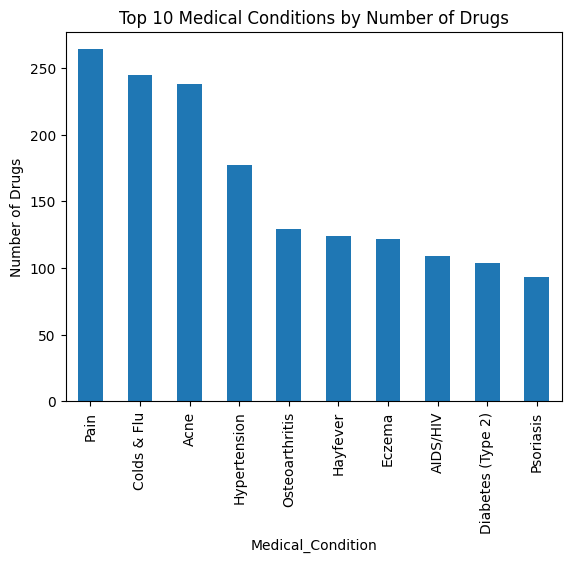

In [26]:
condition_count = data['medical_condition'].value_counts().head(10)
pplt.figure()
condition_count.plot(kind='bar')
pplt.title('Top 10 Medical Conditions by Number of Drugs')
pplt.xlabel('Medical_Condition')
pplt.ylabel('Number of Drugs')
pplt.show()


In [27]:
data['side_effects'].dropna().head()


0    (hives, difficult breathing, swelling in your ...
1    hives ; difficulty breathing; swelling of your...
2    skin rash, fever, swollen glands, flu-like sym...
3    problems with your vision or hearing; muscle o...
4    hives ; difficult breathing; swelling of your ...
Name: side_effects, dtype: object

In [28]:
def split_side_effects(text):
    return [effect.strip().lower() for effect in re.split(r'[;,]', text)]


In [29]:
data.head()

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url,csa_risk
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html,Not Controlled
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html,Not Controlled
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,No Interaction,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html,Not Controlled
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NOT GIVEN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html,Not Controlled
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,No Interaction,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html,Not Controlled


In [31]:
import re
side_effects_series = (
    data['side_effects']
    .dropna()
    .apply(split_side_effects)
    .explode()
)



In [32]:
side_effect_counts = side_effects_series.value_counts().head(10)
side_effect_counts


side_effects
lips                     2273
tongue                   2129
hives                    1940
swelling of your face    1713
difficult breathing      1257
nausea                   1183
vomiting                 1182
itching                  1142
dizziness                 817
diarrhea                  806
Name: count, dtype: int64

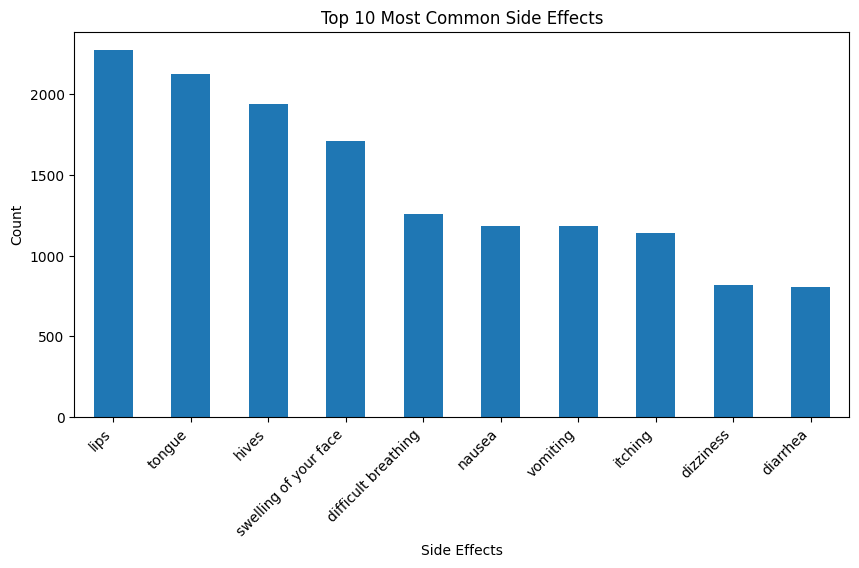

In [35]:
pplt.figure(figsize=(10,5))
side_effect_counts.plot(kind='bar')
pplt.title('Top 10 Most Common Side Effects')
pplt.xlabel('Side Effects')
pplt.ylabel('Count')
pplt.xticks(rotation=45, ha='right')
pplt.show()


In [38]:
data.to_csv("D:/Unified mentor/1 month/project/Drugs, Side Effects and Medical Condition/database/Clean_drugs_side_effects_drugs.csv")

In [39]:
data2 = pd.read_csv("D:/Unified mentor/1 month/project/Drugs, Side Effects and Medical Condition/database/Clean_drugs_side_effects_drugs.csv")

In [41]:
data2.head()

,Unnamed: 0,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url,csa_risk
0,0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html,Not Controlled
1,1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html,Not Controlled
2,2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,No Interaction,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html,Not Controlled
3,3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NOT GIVEN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html,Not Controlled
4,4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,No Interaction,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html,Not Controlled


In [48]:

data2['side_effect_count'] = data2['side_effects'].fillna('').apply(lambda x: len(x.split(',')))


In [49]:
data.groupby('medical_condition')['rating'].mean().sort_values(ascending=False).head(10)


medical_condition
Herpes                  7.690000
Anxiety                 7.622222
Gout                    7.577778
Erectile Dysfunction    7.530769
Swine Flu               6.920000
ADHD                    6.805455
Depression              6.625490
Migraine                6.432787
Bipolar Disorder        6.248936
COPD                    6.065217
Name: rating, dtype: float64

In [56]:
from sqlalchemy import create_engine

username = "postgres"
password = "150808"
host = "localhost"
port = "5432"
database = "drug_data__analysis"

engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")

table_name = "data"


data.to_sql(table_name, engine, if_exists="replace", index=False)

print(f"Data loaded into table '{table_name}' in database '{database}'.")


Data loaded into table 'data' in database 'drug_data__analysis'.
